## Import Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [27]:
data = pd.read_csv('/kaggle/input/assignement-data/data.txt', header=None)
data.columns = ['Feature 1', 'Feature 2', 'Label']

## convert the Data

In [28]:
data_array = np.array(data)


df = pd.DataFrame(data_array, columns=['Feature 1', 'Feature 2', 'Label'])
print("Data in Pandas DataFrame:")
print(df)

Data in Pandas DataFrame:
    Feature 1  Feature 2  Label
0   34.623660  78.024693    0.0
1   30.286711  43.894998    0.0
2   35.847409  72.902198    0.0
3   60.182599  86.308552    1.0
4   79.032736  75.344376    1.0
..        ...        ...    ...
95  83.489163  48.380286    1.0
96  42.261701  87.103851    1.0
97  99.315009  68.775409    1.0
98  55.340018  64.931938    1.0
99  74.775893  89.529813    1.0

[100 rows x 3 columns]


## Extract Features and Split data into traing and testing sets

In [29]:
X = data_array[:, [0, 1]]
y = data_array[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and tain Logistic regression Model

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluate the model

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.80
Precision: 0.90
Recall: 0.75
F1 Score: 0.82

Confusion Matrix:
[[7 1]
 [3 9]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78         8
         1.0       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



## Plot the Descion Boundary

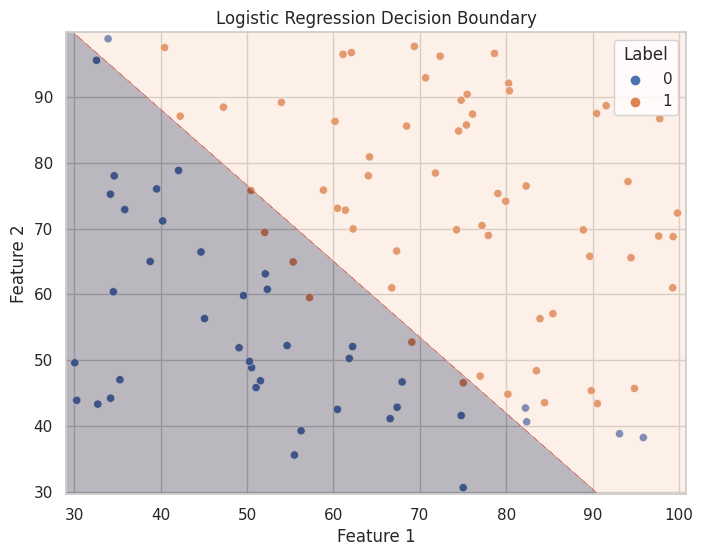

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Label', data=data)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.show()

In [34]:
print("Farhan Mahtab Mahi\nReg no. 2018831036")

Farhan Mahtab Mahi
Reg no. 2018831036
